In [1]:
import csv
import numpy as np
# Nombre del archivo CSV
archivo_csv = "Efecto Hall.csv"

# Diccionario para almacenar las listas por columna
columnas = {}

# Abrir el archivo CSV y leer los datos
with open(archivo_csv, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile,delimiter=";")
    
    # Leer la primera fila que contiene los encabezados
    encabezados = next(reader)
    
    # Inicializar listas vacías en el diccionario por cada encabezado
    for encabezado in encabezados:
        columnas[encabezado] = []

    # Leer los datos de cada fila, convertir a float y agregarlos a las listas correspondientes
    for fila in reader:
        for i, valor in enumerate(fila):
            valor_float = float(valor) if valor.strip() != "" else None
            columnas[encabezados[i]].append(valor_float)

# Imprimir las listas por columna
for encabezado, lista in columnas.items():
    print(f'Columna "{encabezado}": {lista}')

Columna "I(0.01)A": [0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, None, None, None, None, None, None, None, None]
Columna "B(0.1)mT": [0.0, 3.5, 7.5, 11.3, 15.2, 19.0, 23.3, None, None, None, None, None, None, None, None]
Columna "pVh 0": [-5.1, -3.2, -1.5, 0.01, 1.8, 3.3, 4.9, None, None, None, None, None, None, None, None]
Columna "pVh 5": [-8.4, -5.2, -1.3, 1.4, 4.4, 7.4, 10.4, None, None, None, None, None, None, None, None]
Columna "pVh 10": [-11.5, -7.0, -2.0, 2.2, 6.9, 11.0, -15.5, None, None, None, None, None, None, None, None]
Columna "pVh 15": [-15.1, -9.1, -1.9, 3.8, 8.6, 14.8, 20.3, None, None, None, None, None, None, None, None]
Columna "pVh 20": [-18.0, -10.8, -2.3, 4.4, 12.0, 18.6, 25.3, None, None, None, None, None, None, None, None]
Columna "pVh(mV) 0": [1.2, 1.6, 2.0, 2.4, 2.7, 3.0, 3.4, None, None, None, None, None, None, None, None]
Columna "pVh 3.5": [0.9, -0.2, -1.4, -2.6, -3.7, -4.7, -5.6, None, None, None, None, None, None, None, None]
Columna "pVh 7.5": [0.6, -1.6, -4.

In [2]:
A = columnas["I(0.01)A"]
X=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        X.append(A[i])

B=columnas["B(0.1)mT"]
Y=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        Y.append(B[i])

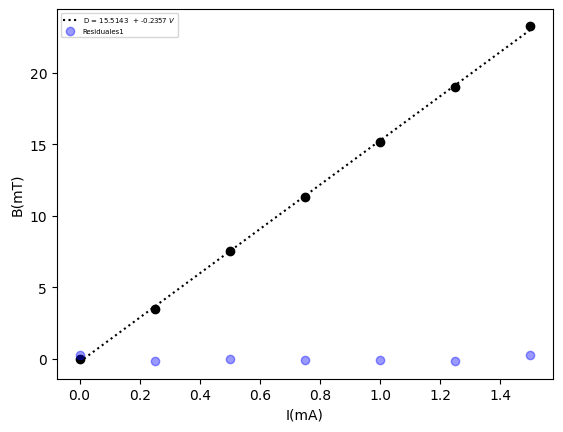

La incertidumbre en el pendiente es de 0.1462
La incertidumbre en el intercepto es de 0.1318


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
#Incertidumbre de la pendiente y de el intercepto en y

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

#delta_m2 = std_err2
#delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales1 = [y1 - ((slope1 * x) + intercept1) for x, y1 in zip(X, Y)]
#residuales2 = [y2 - ((slope2 * x) + intercept2) for x, y2 in zip(X, Y2)]

# Crear la gráfica
plt.scatter(X, Y, color='black')
#plt.scatter(X, Y2, label='Diametro2', color='red')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='black',linestyle='dotted')
#plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='red',linestyle='dotted')
plt.scatter(X, residuales1, label='Residuales1', alpha=0.4, color='blue')
#plt.scatter(X, residuales2, label='Residuales2', alpha=0.4, color='green')

plt.xlabel('I(mA)')
plt.ylabel("B(mT)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(True)  # Remover el rectángulo de la leyenda
plt.savefig("IvsB.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()


print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
#print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
#print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")


In [26]:
A = columnas["pVh 0"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["pVh 5"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["pVh 10"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["pVh 15"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["pVh 20"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["Ip"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

Rh5=[]
for i in range(len(X)):
    Rh5.append((Y1[0]*10**-3)/(B[i]*5*10**-3+1))
    Rh5[0]=0
Rh10=[]
for i in range(len(X)):
    Rh10.append((Y2[0]*10**-3)/(B[i]*10*10**-3+1))
    Rh10[0]=0
Rh15=[]
for i in range(len(X)):
    Rh15.append((Y2[0]*10**-3)/(B[i]*15*10**-3+1))
    Rh15[0]=0
Rh20=[]
for i in range(len(X)):
    Rh20.append((Y2[0]*10**-3)/(B[i]*20*10**-3+1))
    Rh20[0]=0
#Rhpromedio
print(np.sum(Rh5)/len(Rh5))
print(np.sum(Rh10)/len(Rh10))
print(np.sum(Rh15)/len(Rh15))
print(np.sum(Rh20)/len(Rh20))

-0.006630921938386982
-0.008433773369487654
-0.007889464887599186
-0.007421783573569289


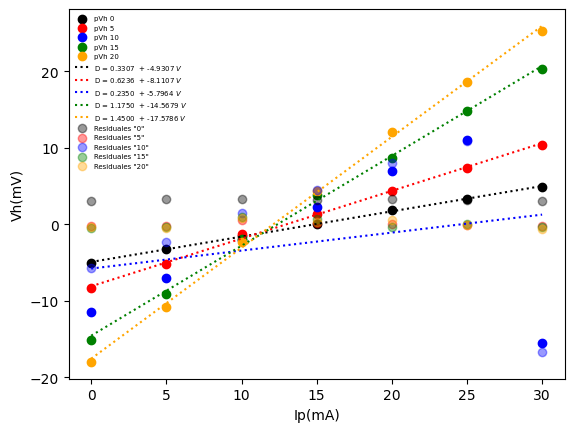

La incertidumbre en el pendiente es de 0.0046
La incertidumbre en el intercepto es de 0.0826
La incertidumbre en el pendiente es de 0.0123
La incertidumbre en el intercepto es de 0.2215
La incertidumbre en el pendiente es de 0.387
La incertidumbre en el intercepto es de 6.9766
La incertidumbre en el pendiente es de 0.0245
La incertidumbre en el intercepto es de 0.4416
La incertidumbre en el pendiente es de 0.0226
La incertidumbre en el intercepto es de 0.407


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='pVh 0', color='black')
plt.scatter(X, Y1, label='pVh 5', color='red')
plt.scatter(X, Y2, label='pVh 10', color='blue')
plt.scatter(X, Y3, label='pVh 15', color='green')
plt.scatter(X, Y4, label='pVh 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vh(mV)')
plt.xlabel("Ip(mA)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVhvsIp.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

In [6]:
A = columnas["pVh(mV) 0"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["pVh 3.5"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["pVh 7.5"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["pVh 11.3"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["pVh 15.2"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["B(0.1)mT"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

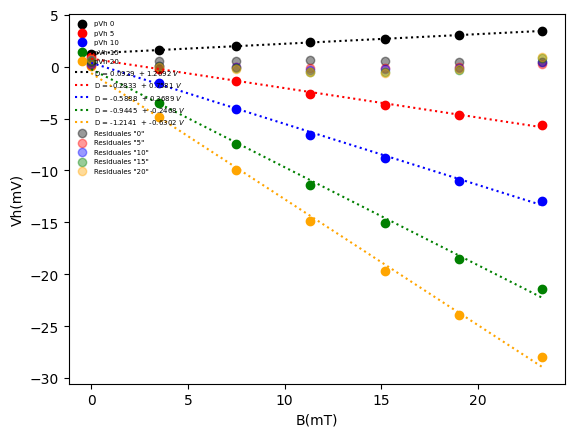

La incertidumbre en el pendiente es de 0.0027
La incertidumbre en el intercepto es de 0.0371
La incertidumbre en el pendiente es de 0.008
La incertidumbre en el intercepto es de 0.1102
La incertidumbre en el pendiente es de 0.0146
La incertidumbre en el intercepto es de 0.201
La incertidumbre en el pendiente es de 0.0278
La incertidumbre en el intercepto es de 0.3837
La incertidumbre en el pendiente es de 0.0321
La incertidumbre en el intercepto es de 0.4425


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='pVh 0', color='black')
plt.scatter(X, Y1, label='pVh 5', color='red')
plt.scatter(X, Y2, label='pVh 10', color='blue')
plt.scatter(X, Y3, label='pVh 15', color='green')
plt.scatter(X, Y4, label='pVh 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vh(mV)')
plt.xlabel("B(mT)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVhvsB.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

In [40]:
A = columnas["pVl(V)(0.001)"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["pVl 0"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["pVl 5"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["pVl 10"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["pVl 20"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["Ip"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])
Sigma=[]
for i in range(len(X)):
    if i==0:
        Sigma.append(0)
    else:
        Sigma.append((0.02*X[i])/(Y[i]*0.02*10**-3))
Sigma1=[]
for i in range(len(X)):
    if i==0:
        Sigma1.append(0)
    else:
        Sigma1.append((0.02*X[i])/(Y1[i]*0.02*10**-3))
        
Sigma2=[]
for i in range(len(X)):
    if i==0:
        Sigma2.append(0)
    else:
        Sigma2.append((0.02*X[i])/(Y2[i]*0.02*10**-3))

Sigma3=[]
for i in range(len(X)):
    if i==0:
        Sigma3.append(0)
    else:
        Sigma3.append((0.02*X[i])/(Y3[i]*0.02*10**-3))
Sigma4=[]
for i in range(len(X)):
    if i==0:
        Sigma4.append(0)
    else:
        Sigma4.append((0.02*X[i])/(Y4[i]*0.02*10**-3))

#Sigma promedio
print("Sigma promedio:")
print(np.sum(Sigma)/len(Sigma))
print(np.sum(Sigma1)/len(Sigma1))
print(np.sum(Sigma2)/len(Sigma2))
print(np.sum(Sigma3)/len(Sigma3))
print(np.sum(Sigma4)/len(Sigma4))

Sigma promedio:
-26764.120811966626
-27030.52069172301
-26783.36735571142
-26143.6722524802
-26854.749591003307


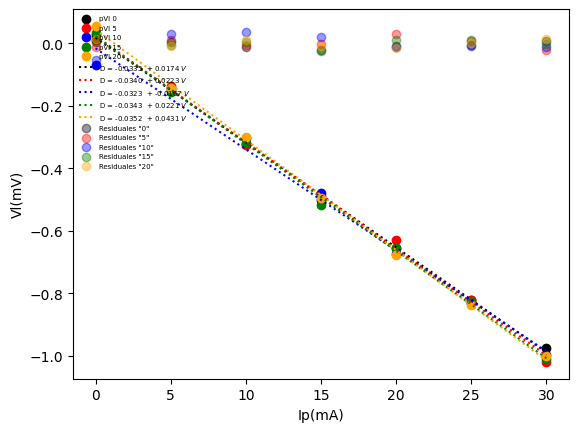

La incertidumbre en el pendiente es de 0.0004
La incertidumbre en el intercepto es de 0.0074
La incertidumbre en el pendiente es de 0.0007
La incertidumbre en el intercepto es de 0.012
La incertidumbre en el pendiente es de 0.0013
La incertidumbre en el intercepto es de 0.0231
La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.0097
La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.0092


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='pVl 0', color='black')
plt.scatter(X, Y1, label='pVl 5', color='red')
plt.scatter(X, Y2, label='pVl 10', color='blue')
plt.scatter(X, Y3, label='pVl 15', color='green')
plt.scatter(X, Y4, label='pVl 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vl(mV)')
plt.xlabel("Ip(mA)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVlvsIp.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

In [10]:
A = columnas["pVh"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])

B=columnas["T"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

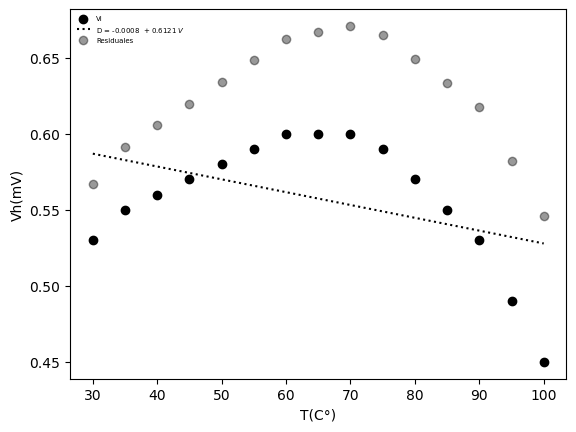

La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.033
La incertidumbre en el pendiente es de 0.0006
La incertidumbre en el intercepto es de 0.0108


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))


# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]

# Crear la gráfica
plt.scatter(X, Y,label='Vl', color='black')

plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')

plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='black')



plt.ylabel('Vh(mV)')
plt.xlabel("T(C°)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVlvsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

In [12]:
A = columnas["pVl"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])

B=columnas["T"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

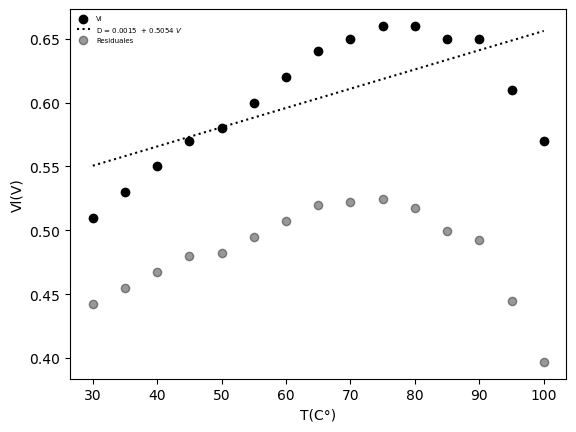

La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.0308
La incertidumbre en el pendiente es de 0.0007
La incertidumbre en el intercepto es de 0.012


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))


# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]

# Crear la gráfica
plt.scatter(X, Y,label='Vl', color='black')

plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')

plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='black')



plt.ylabel('Vl(V)')
plt.xlabel("T(C°)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pVhvsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

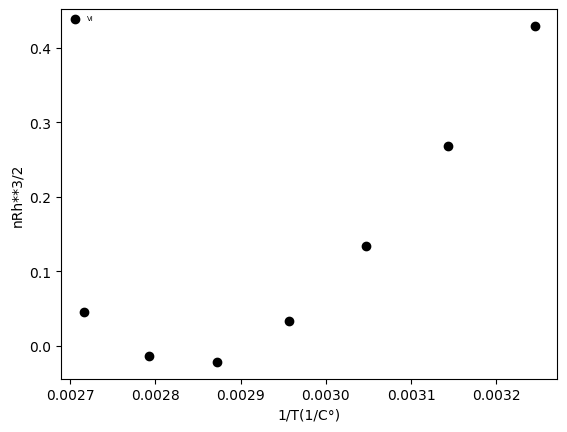

La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.033


In [120]:
P2=[]
for i in range(len(X)):
    P2.append(-np.log(Rh[i]*(X[i])**1.5))
Ti=[]
for i in range(len(X)):
    Ti.append(1/(X[i]+273.15))
for i in range(8):
    P2.pop(i)
    Ti.pop(i)

plt.scatter(Ti, P2,label='Vl', color='black')
Label = "D"




plt.ylabel('nRh**3/2')
plt.xlabel("1/T(1/C°)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("pRh3vsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")

Rh promedio:
-0.04874285714285714
-0.11050476190476191
-0.17275238095238094
-0.22959047619047626


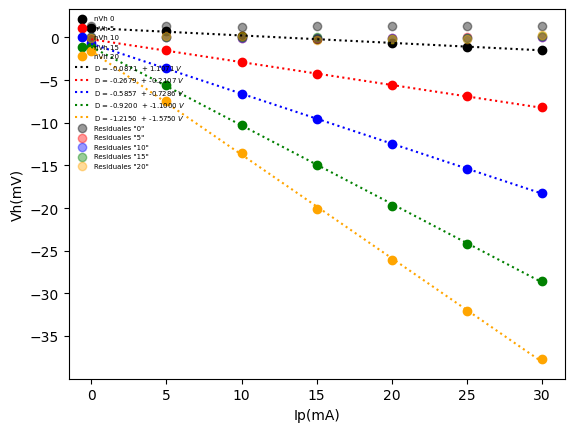

La incertidumbre en el pendiente es de 0.0011
La incertidumbre en el intercepto es de 0.0199
La incertidumbre en el pendiente es de 0.0018
La incertidumbre en el intercepto es de 0.0321
La incertidumbre en el pendiente es de 0.0027
La incertidumbre en el intercepto es de 0.0489
La incertidumbre en el pendiente es de 0.0053
La incertidumbre en el intercepto es de 0.0964
La incertidumbre en el pendiente es de 0.0099
La incertidumbre en el intercepto es de 0.1783


In [45]:
A = columnas["nVh 0"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["nVh 5"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["nVh 10"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["nVh 15"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["nVh 20"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["Ip"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

Rh5=[]
for i in range(len(X)):
    if i==0:
        Rh5.append(0)
    else:
        Rh5.append((Y1[i]*10**-3)/(B[i]*5*10**-3))
Rh10=[]
for i in range(len(X)):
    if i==0:
        Rh10.append(0)
    else:
        Rh10.append((Y2[i]*10**-3)/(B[i]*5*10**-3))
Rh15=[]
for i in range(len(X)):
    if i==0:
        Rh15.append(0)
    else:
        Rh15.append((Y3[i]*10**-3)/(B[i]*5*10**-3))
Rh20=[]
for i in range(len(X)):
    if i==0:
        Rh20.append(0)
    else:
        Rh20.append((Y4[i]*10**-3)/(B[i]*5*10**-3))
print("Rh promedio:")
print(np.sum(Rh5)/len(Rh5))
print(np.sum(Rh10)/len(Rh10))
print(np.sum(Rh15)/len(Rh15))
print(np.sum(Rh20)/len(Rh20))

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='nVh 0', color='black')
plt.scatter(X, Y1, label='nVh 5', color='red')
plt.scatter(X, Y2, label='nVh 10', color='blue')
plt.scatter(X, Y3, label='nVh 15', color='green')
plt.scatter(X, Y4, label='nVh 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vh(mV)')
plt.xlabel("Ip(mA)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("nVhvsIp.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

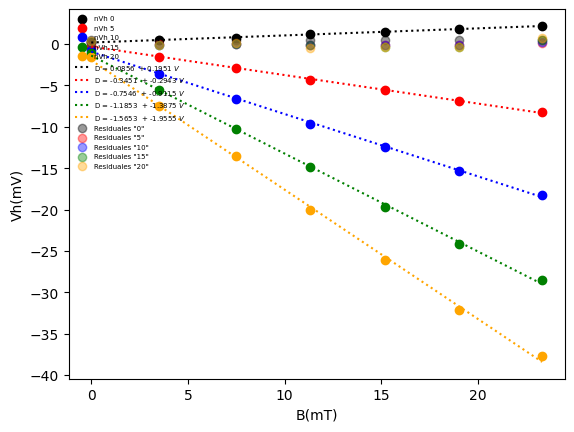

La incertidumbre en el pendiente es de 0.0013
La incertidumbre en el intercepto es de 0.0176
La incertidumbre en el pendiente es de 0.0046
La incertidumbre en el intercepto es de 0.0635
La incertidumbre en el pendiente es de 0.0097
La incertidumbre en el intercepto es de 0.1334
La incertidumbre en el pendiente es de 0.0158
La incertidumbre en el intercepto es de 0.2185
La incertidumbre en el pendiente es de 0.0238
La incertidumbre en el intercepto es de 0.3281


In [15]:
A = columnas["nVh (mT) 0"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["nVh 5"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["nVh 10"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["nVh 15"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["nVh 20"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["B(0.1)mT"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='nVh 0', color='black')
plt.scatter(X, Y1, label='nVh 5', color='red')
plt.scatter(X, Y2, label='nVh 10', color='blue')
plt.scatter(X, Y3, label='nVh 15', color='green')
plt.scatter(X, Y4, label='nVh 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vh(mV)')
plt.xlabel("B(mT)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("nVhvsB.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

Sigma promedio:
16593.94258302222
24941.8224407358
25589.424589629674
25008.552371997754
25008.552371997754


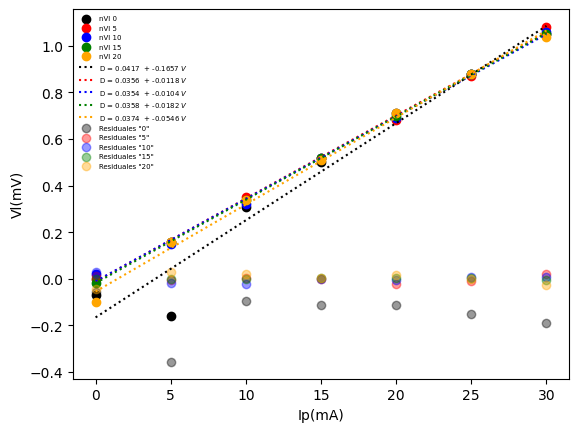

La incertidumbre en el pendiente es de 0.0041
La incertidumbre en el intercepto es de 0.0736
La incertidumbre en el pendiente es de 0.0006
La incertidumbre en el intercepto es de 0.0108
La incertidumbre en el pendiente es de 0.0007
La incertidumbre en el intercepto es de 0.0133
La incertidumbre en el pendiente es de 0.0001
La incertidumbre en el intercepto es de 0.0022
La incertidumbre en el pendiente es de 0.0011
La incertidumbre en el intercepto es de 0.0199


In [53]:
A = columnas["nVl 0"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
A = columnas["nVl 3.5"]
Y1=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y1.append(A[i])
A = columnas["nVl 7.5"]
Y2=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y2.append(A[i])
A = columnas["nVl 11.3"]
Y3=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y3.append(A[i])
A = columnas["nVl 15.2"]
Y4=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y4.append(A[i])

B=columnas["Ip"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

Sigma=[]
for i in range(len(X)):
    if i==0:
        Sigma.append(0)
    else:
        Sigma.append((0.02*X[i])/(Y[i]*0.02*10**-3))
Sigma1=[]
for i in range(len(X)):
    if i==0:
        Sigma1.append(0)
    else:
        Sigma1.append((0.02*X[i])/(Y1[i]*0.02*10**-3))
Sigma2=[]
for i in range(len(X)):
    if i==0:
        Sigma2.append(0)
    else:
        Sigma2.append((0.02*X[i])/(Y2[i]*0.02*10**-3))
Sigma3=[]
for i in range(len(X)):
    if i==0:
        Sigma3.append(0)
    else:
        Sigma3.append((0.02*X[i])/(Y3[i]*0.02*10**-3))
Sigma4=[]
for i in range(len(X)):
    if i==0:
        Sigma4.append(0)
    else:
        Sigma4.append((0.02*X[i])/(Y3[i]*0.02*10**-3))
#Sigma promedio
print("Sigma promedio:")
print(np.sum(Sigma)/len(Sigma))
print(np.sum(Sigma1)/len(Sigma1))
print(np.sum(Sigma2)/len(Sigma2))
print(np.sum(Sigma3)/len(Sigma3))
print(np.sum(Sigma4)/len(Sigma4))

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(X, Y1)
regression_line1 = [(slope1 * x) + intercept1 for x in X]
Label = "D"
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(X, Y2)
regression_line2 = [(slope2 * x) + intercept2 for x in X]
label="D"
slope3, intercept3, r_value3, p_value3, std_err3 = linregress(X, Y3)
regression_line3 = [(slope3 * x) + intercept3 for x in X]
Label = "D"
slope4, intercept4, r_value4, p_value4, std_err4 = linregress(X, Y4)
regression_line4 = [(slope4 * x) + intercept4 for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))

delta_m1 = std_err1
delta_b1 = std_err1 * np.sqrt(np.mean(np.array(X)**2))

delta_m2 = std_err2
delta_b2 = std_err2 * np.sqrt(np.mean(np.array(X)**2))

delta_m3 = std_err3
delta_b3 = std_err3 * np.sqrt(np.mean(np.array(X)**2))

delta_m4 = std_err4
delta_b4 = std_err4 * np.sqrt(np.mean(np.array(X)**2))

# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]
residuales1 = [y - ((slope1 * x) + intercept1) for x, y in zip(X, Y1)]
residuales2 = [y - ((slope2 * x) + intercept2) for x, y in zip(X, Y2)]
residuales3 = [y - ((slope3 * x) + intercept3) for x, y in zip(X, Y3)]
residuales4 = [y - ((slope4 * x) + intercept4) for x, y in zip(X, Y4)]

# Crear la gráfica
plt.scatter(X, Y,label='nVl 0', color='black')
plt.scatter(X, Y1, label='nVl 5', color='red')
plt.scatter(X, Y2, label='nVl 10', color='blue')
plt.scatter(X, Y3, label='nVl 15', color='green')
plt.scatter(X, Y4, label='nVl 20', color='orange')
plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')
plt.plot(X, regression_line1, label=f'{Label} = {slope1:.4f}  + {intercept1:.4f} $V$', color='red',linestyle='dotted')
plt.plot(X, regression_line2, label=f'{Label} = {slope2:.4f}  + {intercept2:.4f} $V$', color='blue',linestyle='dotted')
plt.plot(X, regression_line3, label=f'{Label} = {slope3:.4f}  + {intercept3:.4f} $V$', color='green',linestyle='dotted')
plt.plot(X, regression_line4, label=f'{Label} = {slope4:.4f}  + {intercept4:.4f} $V$', color='orange',linestyle='dotted')
plt.scatter(X, residuales, label='Residuales "0"', alpha=0.4, color='black')
plt.scatter(X, residuales1, label='Residuales "5"', alpha=0.4, color='red')
plt.scatter(X, residuales2, label='Residuales "10"', alpha=0.4, color='blue')
plt.scatter(X, residuales3, label='Residuales "15"', alpha=0.4, color='green')
plt.scatter(X, residuales4, label='Residuales "20"', alpha=0.4, color='orange')



plt.ylabel('Vl(mV)')
plt.xlabel("Ip(mA)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("nVlvsIp.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m2,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b2,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m3,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b3,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m4,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b4,4)}")

[-1.4, -1.5, -1.6, -1.7, -1.8, -1.9, -2.0, -2.1, -2.2, -2.3, -2.3, -2.4, -2.5, -2.5, -2.6]


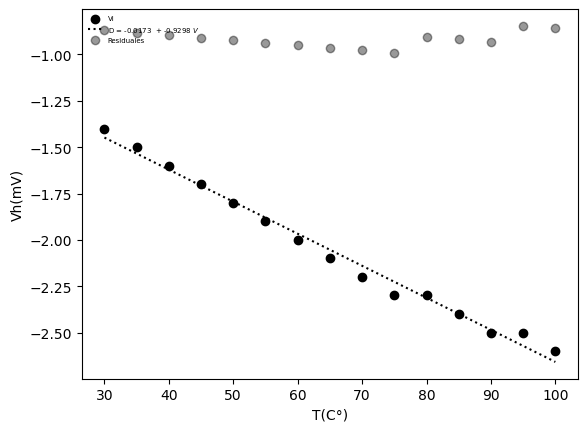

La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.0364
La incertidumbre en el pendiente es de 0.0006
La incertidumbre en el intercepto es de 0.0108


In [62]:
A = columnas["nVh"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])
print(Y)
B=columnas["T"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))


# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]

# Crear la gráfica
plt.scatter(X, Y,label='Vl', color='black')

plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')

plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='black')



plt.ylabel('Vh(mV)')
plt.xlabel("T(C°)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("nVhvsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

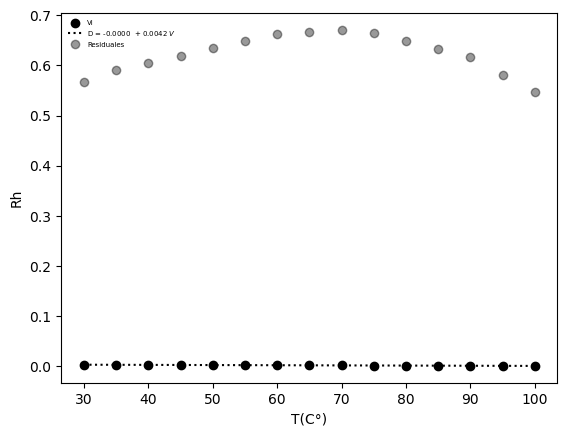

La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.033


In [74]:
Rh=[]
for i in range(len(Y)):
    Rh.append((Y[i]*10**-3)/(X[i]*5*10**-3))
plt.scatter(X, Rh,label='Vl', color='black')
slope, intercept, r_value, p_value, std_err = linregress(X, Rh)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"

plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')

plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='black')



plt.ylabel('Rh')
plt.xlabel("T(C°)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("nRhvsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")

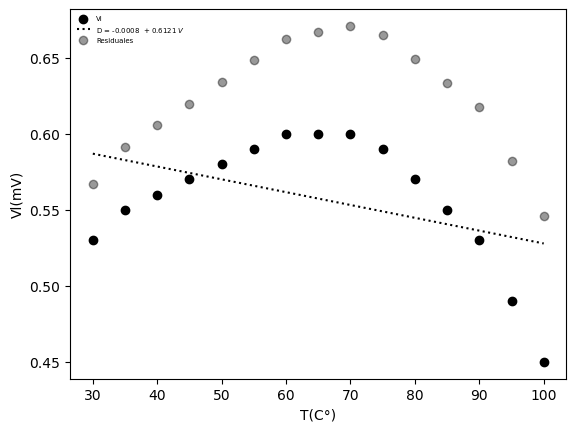

La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.033
La incertidumbre en el pendiente es de 0.0006
La incertidumbre en el intercepto es de 0.0108


In [73]:
A = columnas["nVl"]
Y=[]
for i in range(len(A)):
    if A[i]== None:
        pass
    else:
        Y.append(A[i])

B=columnas["T"]
X=[]
for i in range(len(B)):
    if B[i]== None:
        pass
    else:
        X.append(B[i])

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Realizar la regresión por mínimos cuadrados
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
regression_line = [(slope * x) + intercept for x in X]
Label = "D"

#Incertidumbre de la pendiente y de el intercepto en y

delta_m = std_err
delta_b = std_err * np.sqrt(np.mean(np.array(X)**2))


# Calcular los residuales
residuales = [y - ((slope * x) + intercept1) for x, y in zip(X, Y)]

# Crear la gráfica
plt.scatter(X, Y,label='Vl', color='black')

plt.plot(X, regression_line, label=f'{Label} = {slope:.4f}  + {intercept:.4f} $V$', color='black',linestyle='dotted')

plt.scatter(X, residuales, label='Residuales', alpha=0.4, color='black')



plt.ylabel('Vl(mV)')
plt.xlabel("T(C°)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("nVlvsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")
print(f"La incertidumbre en el pendiente es de {round(delta_m1,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b1,4)}")

7


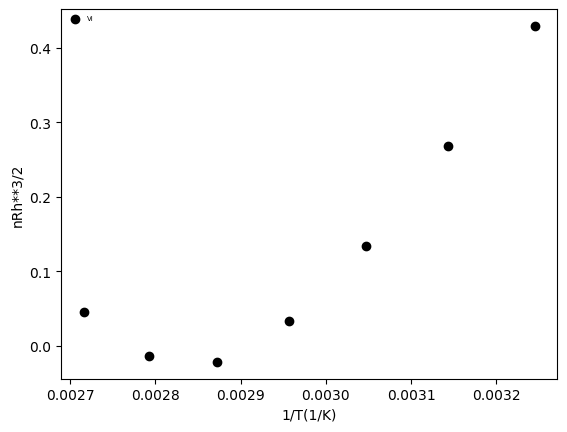

La incertidumbre en el pendiente es de 0.0005
La incertidumbre en el intercepto es de 0.033


In [119]:
P2=[]
for i in range(len(X)):
    P2.append(-np.log(Rh[i]*(X[i])**1.5))
Ti=[]
for i in range(len(X)):
    Ti.append(1/(X[i]+273.15))
for i in range(8):
    P2.pop(i)
    Ti.pop(i)

plt.scatter(Ti, P2,label='Vl', color='black')
Label = "D"




plt.ylabel('nRh**3/2')
plt.xlabel("1/T(1/K)")
#plt.title('D vs 1/ V^(-1/2)')
legend = plt.legend(fontsize="5",loc='upper left')
legend.set_frame_on(False)  # Remover el rectángulo de la leyenda
plt.savefig("nRh3vsT.png",bbox_inches='tight')
# Mostrar la gráfica
plt.show()

print(f"La incertidumbre en el pendiente es de {round(delta_m,4)}")
print(f"La incertidumbre en el intercepto es de {round(delta_b,4)}")